In [2]:
import pandas as pd
import numpy as np
import scipy.stats

import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
ratings = pd.read_csv('ratings.csv')
ratings.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [4]:
# No missing data
ratings.isnull().sum()

user_id    0
book_id    0
rating     0
dtype: int64

In [5]:
print('The ratings dataset has ', ratings['user_id'].nunique(), ' unique users')
print('The ratings dataset has ', ratings['book_id'].nunique(), ' unique books')
print('The ratings dataset has ', ratings['rating'].nunique(), ' unique ratings')

print('The unique ratings are ', sorted(ratings['rating'].unique()))

The ratings dataset has  53424  unique users
The ratings dataset has  10000  unique books
The ratings dataset has  5  unique ratings
The unique ratings are  [1, 2, 3, 4, 5]


In [6]:
books = pd.read_csv('books.csv')
books.head()
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   book_id                    10000 non-null  int64  
 1   goodreads_book_id          10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  9979 non-null   float64
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code              8916 non-null   object 
 12  average_rating             10000 non-null  float64
 13  ratings_count              10000 non-null  int6

In [7]:
# using book_id as matching key we can merge the two tables
df = pd.merge(ratings, books, on='book_id', how='inner')
df.head()

,user_id,book_id,rating,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,258,5,1232,1232,3209783,279,143034901,9.780143e+12,"Carlos Ruiz Zafón, Lucia Graves",...,263685,317554,24652,4789,11769,42214,101612,157170,https://images.gr-assets.com/books/1344545047m...,https://images.gr-assets.com/books/1344545047s...
1,11,258,3,1232,1232,3209783,279,143034901,9.780143e+12,"Carlos Ruiz Zafón, Lucia Graves",...,263685,317554,24652,4789,11769,42214,101612,157170,https://images.gr-assets.com/books/1344545047m...,https://images.gr-assets.com/books/1344545047s...
2,143,258,4,1232,1232,3209783,279,143034901,9.780143e+12,"Carlos Ruiz Zafón, Lucia Graves",...,263685,317554,24652,4789,11769,42214,101612,157170,https://images.gr-assets.com/books/1344545047m...,https://images.gr-assets.com/books/1344545047s...
3,242,258,5,1232,1232,3209783,279,143034901,9.780143e+12,"Carlos Ruiz Zafón, Lucia Graves",...,263685,317554,24652,4789,11769,42214,101612,157170,https://images.gr-assets.com/books/1344545047m...,https://images.gr-assets.com/books/1344545047s...
4,325,258,4,1232,1232,3209783,279,143034901,9.780143e+12,"Carlos Ruiz Zafón, Lucia Graves",...,263685,317554,24652,4789,11769,42214,101612,157170,https://images.gr-assets.com/books/1344545047m...,https://images.gr-assets.com/books/1344545047s...


# EXPLORATORY DATA ANALYSIS

In [8]:
agg_ratings = df.groupby('title').agg(mean_rating=('rating','mean'),no_of_ratings=('rating','count')).reset_index()
agg_rating_GT500 = agg_ratings[agg_ratings['no_of_ratings']>1000]

agg_rating_GT500.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1229 entries, 3 to 9877
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          1229 non-null   object 
 1   mean_rating    1229 non-null   float64
 2   no_of_ratings  1229 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 38.4+ KB


In [9]:
table = agg_rating_GT500.sort_values(by = 'no_of_ratings',ascending= False)

In [10]:
table['no_of_ratings'].sum()

3431037

In [11]:
table['mean_rating'].sum()

4808.477168215071

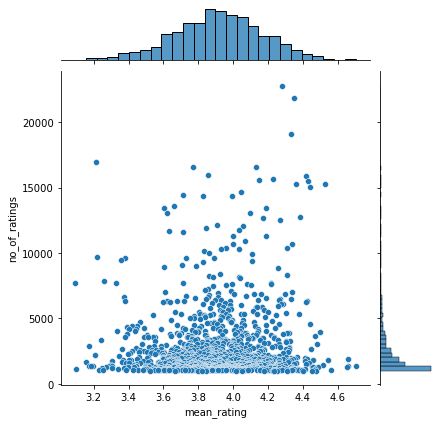

In [12]:
# VISUALISATION OF DATA
sns.jointplot(x='mean_rating', y = 'no_of_ratings', data = table)

In [13]:
df_GT500 = pd.merge(df,agg_rating_GT500[['title']], on ='title' ,how ='inner')

In [14]:
df_GT500.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3431037 entries, 0 to 3431036
Data columns (total 25 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   user_id                    int64  
 1   book_id                    int64  
 2   rating                     int64  
 3   goodreads_book_id          int64  
 4   best_book_id               int64  
 5   work_id                    int64  
 6   books_count                int64  
 7   isbn                       object 
 8   isbn13                     float64
 9   authors                    object 
 10  original_publication_year  float64
 11  original_title             object 
 12  title                      object 
 13  language_code              object 
 14  average_rating             float64
 15  ratings_count              int64  
 16  work_ratings_count         int64  
 17  work_text_reviews_count    int64  
 18  ratings_1                  int64  
 19  ratings_2                  int64  
 20  ra

In [15]:
df_GT500['user_id'].nunique()

53415

In [16]:
matrix = df_GT500.pivot_table(index = 'user_id', columns='title' ,values = 'rating')

In [17]:
matrix.head()

title,'Salem's Lot,11/22/63,1776,1984,1Q84,"1st to Die (Women's Murder Club, #1)","2001: A Space Odyssey (Space Odyssey, #1)",A Bend in the Road,"A Breath of Snow and Ashes (Outlander, #6)",A Brief History of Time,...,Wonder,"Wool Omnibus (Silo, #1)","Words of Radiance (The Stormlight Archive, #2)",World War Z: An Oral History of the Zombie War,"World Without End (The Kingsbridge Series, #2)",Wuthering Heights,"Xenocide (Ender's Saga, #3)",Year of Wonders,Yes Please,Zen and the Art of Motorcycle Maintenance: An Inquiry Into Values
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,4.0,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
normal_matrix = matrix.subtract(matrix.mean(axis = 1),axis = 'rows')
normal_matrix.head()

title,'Salem's Lot,11/22/63,1776,1984,1Q84,"1st to Die (Women's Murder Club, #1)","2001: A Space Odyssey (Space Odyssey, #1)",A Bend in the Road,"A Breath of Snow and Ashes (Outlander, #6)",A Brief History of Time,...,Wonder,"Wool Omnibus (Silo, #1)","Words of Radiance (The Stormlight Archive, #2)",World War Z: An Oral History of the Zombie War,"World Without End (The Kingsbridge Series, #2)",Wuthering Heights,"Xenocide (Ender's Saga, #3)",Year of Wonders,Yes Please,Zen and the Art of Motorcycle Maintenance: An Inquiry Into Values
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,0.446809,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.446809,NaN,NaN,0.446809,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,0.183673,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,0.224000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
print('Total negative values in first row ', (normal_matrix.loc[[1]] < 0).sum().sum())
print('Total positive values in first row ', (normal_matrix.loc[[1]] > 0).sum().sum())
print('Total null values in first row', normal_matrix.loc[[1]].isna().sum().sum())

Total negative values in first row  47
Total positive values in first row  47
Total null values in first row 1135


In [20]:
normal_matrix1 = matrix.iloc[:26000,:]
normal_matrix2 = matrix.iloc[26000:,:]

normal_matrix1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26000 entries, 1 to 26004
Columns: 1229 entries, 'Salem's Lot to Zen and the Art of Motorcycle Maintenance: An Inquiry Into Values
dtypes: float64(1229)
memory usage: 244.0 MB


In [21]:
 normal_matrix2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27415 entries, 26005 to 53424
Columns: 1229 entries, 'Salem's Lot to Zen and the Art of Motorcycle Maintenance: An Inquiry Into Values
dtypes: float64(1229)
memory usage: 257.3 MB


In [22]:
user_similarity1 = normal_matrix1.T.corr()

In [23]:
user_similarity1.head()

user_id,1,2,3,4,5,6,7,8,9,10,...,25995,25996,25997,25998,25999,26000,26001,26002,26003,26004
user_id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,-0.131559,0.366900,0.464755,NaN,0.061898,0.777714,0.074390,-0.230062,0.161977,...,0.477332,0.763763,0.174078,0.309058,NaN,1.000000,2.850841e-01,0.101914,-1.000000,NaN
2,-0.131559,1.000000,-0.500000,0.753636,NaN,NaN,0.000000,0.119523,0.289537,0.388889,...,-0.577350,0.618718,-0.551014,1.000000,NaN,0.487950,9.095086e-02,-0.333333,NaN,NaN
3,0.366900,-0.500000,1.000000,-0.009615,NaN,0.866025,-0.405554,0.318328,-0.255883,0.241402,...,0.161165,0.333333,0.201008,0.327327,NaN,NaN,-3.647231e-02,0.530330,NaN,NaN
4,0.464755,0.753636,-0.009615,1.000000,NaN,-0.349215,0.083540,-0.037910,-0.045265,0.387233,...,0.094427,0.272950,0.102754,0.164932,NaN,0.193649,2.341233e-01,0.009731,0.083478,NaN
5,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.866025,NaN,0.577350,-1.110223e-16,NaN,NaN,NaN


In [25]:
user_similarity2 = normal_matrix2.T.corr()

In [26]:
user_similarity2.head()

user_id,26005,26006,26007,26008,26009,26010,26011,26012,26013,26014,...,53415,53416,53417,53418,53419,53420,53421,53422,53423,53424
user_id,,,,,,,,,,,,,,,,,,,,,
26005,1.000000,NaN,0.300501,NaN,1.000000,5.000000e-01,NaN,NaN,-4.053961e-16,-0.127573,...,-1.018811e-16,NaN,-2.182179e-01,NaN,0.021999,0.209757,0.418330,0.867722,0.500000,0.866025
26006,NaN,1.000000,NaN,0.000000,0.759257,3.818813e-01,-0.132453,-0.571739,1.767767e-01,-0.029050,...,NaN,NaN,1.000000e+00,NaN,-0.227429,0.358073,0.050000,0.164399,-0.603023,0.746203
26007,0.300501,NaN,1.000000,NaN,-0.447214,-1.558573e-01,1.000000,NaN,-3.246172e-01,0.372104,...,-1.084652e-01,NaN,NaN,NaN,0.208726,0.425115,0.650814,0.083333,0.500000,0.547723
26008,NaN,0.000000,NaN,1.000000,-0.188982,3.510833e-16,NaN,0.875000,NaN,NaN,...,8.660254e-01,NaN,3.000000e-01,NaN,-0.418330,0.880705,-0.577350,NaN,NaN,-0.081786
26009,1.000000,0.759257,-0.447214,-0.188982,1.000000,7.276069e-01,NaN,0.072548,NaN,-0.410792,...,-2.537596e-01,NaN,-9.064933e-17,NaN,0.441942,0.796333,-0.394055,0.462910,0.043033,0.408248


In [36]:
# #checking for user 2 
picked_user_id = 2
dropped_user = user_similarity1.iloc[picked_user_id-1]
# user_similarity1.drop(index = picked_user_id,inplace = True)

# user_similarity1.head()
dropped_user

user_id
1       -0.131559
2        1.000000
3       -0.500000
4        0.753636
5             NaN
           ...   
26000    0.487950
26001    0.090951
26002   -0.333333
26003         NaN
26004         NaN
Name: 2, Length: 26000, dtype: float64

In [27]:
# now we will get 10 most similar user for this id
n = 10
user_similarity_threshold = 0.3
similar_users = user_similarity1[user_similarity1[picked_user_id] > user_similarity_threshold][picked_user_id]
print('Similar Users for user are' , similar_users)

Similar Users for user are user_id
5        1.000000
16       1.000000
27       0.686406
32       1.000000
33       0.632456
           ...   
25949    0.500000
25960    0.500000
25993    0.500000
25998    0.866025
26000    0.577350
Name: 5, Length: 3207, dtype: float64


In [28]:
normal_matrix_withNaN = matrix.subtract(matrix.mean(axis = 1),axis = 'rows')

normal_matrix1_withNaN = normal_matrix_withNaN.iloc[:26000,:]
normal_matrix2_withNaN = normal_matrix_withNaN.iloc[26000:,:]

picked_userid_watched = normal_matrix1_withNaN[normal_matrix1_withNaN.index == picked_user_id].dropna(axis = 1,how = 'all')
picked_userid_watched

title,As I Lay Dying,Big Little Lies,"Doctor Sleep (The Shining, #2)",Eleanor & Park,"In the Woods (Dublin Murder Squad, #1)",Joyland,"Me Before You (Me Before You, #1)","Miss Peregrine’s Home for Peculiar Children (Miss Peregrine’s Peculiar Children, #1)","Mr. Mercedes (Bill Hodges Trilogy, #1)",Northanger Abbey,...,The Ocean at the End of the Lane,The Polar Express,The Round House,The Running Man,The Secret Life of Bees,"The Silkworm (Cormoran Strike, #2)",Under the Dome,We Were the Mulvaneys,When Breath Becomes Air,White Oleander
user_id,,,,,,,,,,,,,,,,,,,,,
5,-1.0,0.0,1.0,1.0,0.0,1.0,0.0,-1.0,1.0,1.0,...,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,1.0,-1.0


In [29]:
similar_user_movies = normal_matrix1_withNaN[normal_matrix1_withNaN.index.isin(similar_users.index)].dropna(axis = 1,how = 'all')
similar_user_movies

title,'Salem's Lot,11/22/63,1776,1984,1Q84,"1st to Die (Women's Murder Club, #1)","2001: A Space Odyssey (Space Odyssey, #1)",A Bend in the Road,"A Breath of Snow and Ashes (Outlander, #6)",A Brief History of Time,...,Wonder,"Wool Omnibus (Silo, #1)","Words of Radiance (The Stormlight Archive, #2)",World War Z: An Oral History of the Zombie War,"World Without End (The Kingsbridge Series, #2)",Wuthering Heights,"Xenocide (Ender's Saga, #3)",Year of Wonders,Yes Please,Zen and the Art of Motorcycle Maintenance: An Inquiry Into Values
user_id,,,,,,,,,,,,,,,,,,,,,
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.173077,NaN,NaN,NaN,NaN,NaN,NaN
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.694444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.136364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.086420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.132075,NaN


In [30]:
item_score = {}

for i in similar_user_movies.columns:
    movie_rating = similar_user_movies[i]
    total = 0 
    count = 0
    for u in similar_users.index:
        if pd.isna(movie_rating[u]) == False:
            score = similar_users[u]*movie_rating[u]
            total += score
            count += 1
    item_score[i] = total/count
item_score = pd.DataFrame(item_score.items(), columns = ['books','books_score'])
ranked_item_score = item_score.sort_values(by = 'books_score', ascending = False)

recommendation1 = ranked_item_score.head(5)
recommendation1.head()

,books,books_score
355,"Harry Potter Boxset (Harry Potter, #1-7)",0.734465
156,Calvin and Hobbes,0.689175
1221,"Words of Radiance (The Stormlight Archive, #2)",0.606286
1193,When Breath Becomes Air,0.561566
358,Harry Potter and the Deathly Hallows (Harry Po...,0.517647


In [31]:
recommend = recommendation1["books"].tolist()

In [32]:
for i in range(len(recommend)):
    print(i+1 , ' ' , recommend[i])

1   Harry Potter Boxset (Harry Potter, #1-7)
2   Calvin and Hobbes
3   Words of Radiance (The Stormlight Archive, #2)
4   When Breath Becomes Air
5   Harry Potter and the Deathly Hallows (Harry Potter, #7)


In [ ]:
user_similarity1 = user_similarity1.concat(user_similarity1, dropped_user)


## ENTER USER ID

In [1]:
# change user id here to test
picked_user_id = int(input("Enter user id"))

Enter user id5
